In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
#read data
df= pd.read_csv("F:/ML/Git ML/TwitterDataAnalysis/sm.csv")
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [4]:
#preprocessing
#getting the list of columns with nan
ml= df.columns[df.isna().any()].tolist()
ml

['gender', 'age']

In [5]:
dfm=df #making another datframe
#getting the ratio of the index labels
val =pd.DataFrame(df['gender'].value_counts(normalize=True))
print ("The probability ratio before filling the missing values in gender is" )
print (df['gender'].value_counts(normalize=True))
#index labels in a list
valr = val.index.tolist()
#drc.index = valr
#columns values in a list
valc =val['gender'].tolist()
#replacing the nan values with ratio
dfm['gender'] = dfm['gender'].fillna(pd.Series(np.random.choice(valr,p=valc, size=len(dfm))))
print ("The probability ratio after filling the missing vlaues in gender is" )
print ((dfm['gender'].value_counts(normalize=True)))

The probability ratio before filling the missing values in gender is
F    0.80855
M    0.19145
Name: gender, dtype: float64
The probability ratio after filling the missing vlaues in gender is
F    0.808367
M    0.191633
Name: gender, dtype: float64


In [6]:
#distribution of the age data
dfm.loc[:,"age"].describe()

count    24914.000000
mean        17.993950
std          7.858054
min          3.086000
25%         16.312000
50%         17.287000
75%         18.259000
max        106.927000
Name: age, dtype: float64

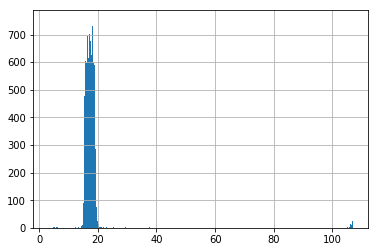

In [7]:
#histogram of the age data 
dfm.loc[:,"age"].hist(bins=1000)

In [8]:
#eliminating the outliers
for item in dfm.loc[:,"age"]:
    if item >20.5:
        dfm.loc[:,"age"].replace(item, np.nan, inplace=True)
    elif item <14.75:
        dfm.loc[:,"age"].replace(item, np.nan, inplace=True)
    #print (item)

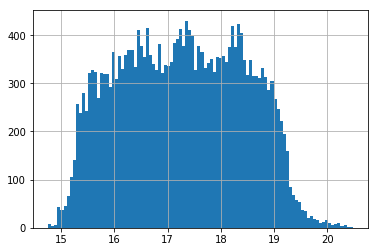

In [9]:
#sanity check of the outliers
dfm.loc[:,"age"].hist(bins=100)

In [10]:
#getting the rows with the null values
dfm[dfm.isnull().any(axis=1)].head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
5,2006,F,NaN,142,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
13,2006,M,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,2006,F,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,2006,F,NaN,135,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,2006,F,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#filling the missing ages with the median of that grad year
dfm.age = dfm.groupby('gradyear')['age'].apply(lambda x: x.fillna(x.median()))
dfm.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,F,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [12]:
#sanity check for null values
dfm[dfm.isnull().any(axis=1)]

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs


In [13]:
#normalizing
dfm.iloc[:,4:] = (dfm.iloc[:,4:]-dfm.iloc[:,4:].min())/(dfm.iloc[:,4:].mean()-dfm.iloc[:,4:].min())
dfm.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,2006,F,18.801,0,0.0,3.963535,0.0,0.0,0.0,0.0,...,0.0,3.885507,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,2006,M,18.335,69,0.0,3.963535,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,8.754012,0.000000,0.000000
3,2006,F,18.875,0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,2006,F,18.995,10,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,5.665722,0.0,0.0,0.0,0.0,0.000000,11.367942,16.547159


In [14]:
#sanity check
print ("The median before filling the missing values is")
print ((df.groupby('gradyear')[['age']].median()))
print ("The median after filling the missing values is")
print ((dfm.groupby('gradyear')[['age']].median()))
#end of preprocessing


The median before filling the missing values is
             age
gradyear        
2006      18.675
2007      17.692
2008      16.734
2009      15.786
The median after filling the missing values is
             age
gradyear        
2006      18.675
2007      17.692
2008      16.734
2009      15.786


In [16]:
#selecting the features for clustering
X = dfm.iloc[:,4:].values
kmeans =KMeans(n_clusters = 5, init='k-means++', max_iter = 300, n_init= 10, random_state = 0)
ykmeans = kmeans.fit_predict(X)
clusters = kmeans.cluster_centers_

for item in ykmeans:
    print(item)

In [17]:
#making a function to highlight the max values
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]
#df for cluster center and its features
clust = pd.DataFrame(clusters,columns=dfm.columns[4:].values)
clust.style.apply(highlight_max)

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2.01121,2.00043,1.73938,1.67938,1.94727,2.27348,2.96261,2.31516,2.07552,2.55307,2.28794,6.6417,2.42074,2.45074,8.46728,1.94451,1.54003,0.556622,1.97108,2.99512,1.60579,1.3982,1.22254,0.0662076,4.62379,2.43113,5.52504,2.68363,2.11931,3.76965,9.51503,11.4191,3.14811,2.5718,4.83833,9.746
1,0,7.92707,0,0,0,7.44048,0,0,0,0,3.09725,105.062,7.08215,0,0,2.35202,3.33778,0,0,4.10959,21.4915,0,8.92326,0,28.3979,18.0234,3305.26,0,0,6.73401,0,0,32.591,52.5241,68.2077,0
2,0.910323,0.913898,0.93782,0.942462,0.921152,0.88754,0.84676,0.891022,0.901857,0.873297,0.892493,0.534116,0.88915,0.880823,0.398734,0.919579,0.77773,0.472739,0.906709,0.828882,0.879375,0.903736,0.838908,0,0.706242,0.879095,0.517958,0.869855,0.908039,0.773995,0.342204,0.189356,0.816626,0.857503,0.690578,0.297477
3,0.808789,1.48441,0.693282,0.814356,0.647397,1.32147,0.506915,0.662307,1.81261,0.827555,1.14802,0.866605,0.929703,0.823437,1.19721,1.2986,19.1117,60.1023,1.95187,1.55498,1.1866,1.13574,1.06803,0.723938,1.06903,1.32218,0.819553,0.975127,1.10471,1.118,0.331575,0.603675,1.23737,1.31817,0.614483,0.95833
4,1.71546,1.16971,1.42009,1.3566,1.4685,1.54812,1.25437,1.53773,1.3614,1.39554,1.30203,2.26103,1.00744,1.42549,1.87215,1.20847,1.41023,0.889,1.47618,1.55309,5.074,4.67975,9.22639,62.9976,1.49225,1.30105,1.4593,0.923942,1.1969,1.45832,0.881266,0.954377,1.68375,1.84002,1.59296,2.07279


It looks like cluster 0 is insterested in sports.
another intersetinf fact is that the last columns which can be termed as negative physcolgical impac are in cluster 2. We could target them with positive quotes.